# Bay Area Bike Share Trips Data

This sample notebook demonstrates working with Google BigQuery datasets.

The sample data used in this notebook shares the same schema as the Bay Area Bike Share Trips Data. It is also small in size. This notebook demonstrates one possible custom analytics scenario.


## First we have to define the use of bigquery

In [37]:
import google.datalab.bigquery as bq

# Understand the data structure
It's helpful to inspect schema and a sample of the data we're working with

In [38]:
%%bq tables describe -n "bigquery-public-data.san_francisco.bikeshare_trips"

In [39]:
%%bq query -n cyclesharing
#standardSQL
SELECT
  EXTRACT(YEAR FROM start_date) AS year,
  ROUND(AVG(duration_sec/60), 2) AS avg_duration_min,
  COUNT(*) AS yearly_trips
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY
  YEAR
ORDER BY
  YEAR DESC


# How long was the average ride length each year?



In [40]:
%%bq execute -q cyclesharing

year,avg_duration_min,yearly_trips
2016,13.82,210494
2015,15.68,346252
2014,18.87,326339
2013,21.97,100563


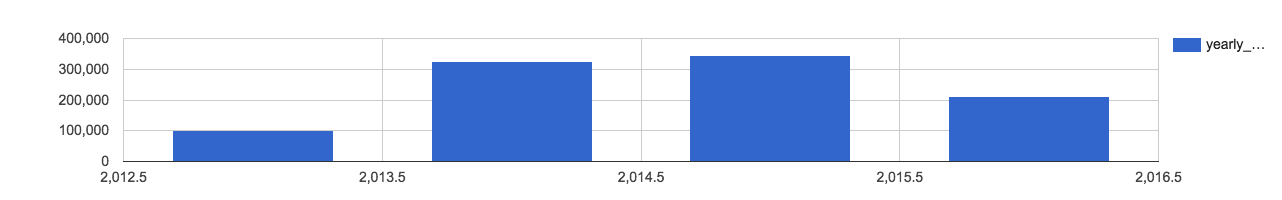

In [41]:
%%chart columns --data cyclesharing --fields year,yearly_trips

# Another Example

I'm going to use some GitHub data From Google's Public Datasets to find some intresting details for the most popular programming language for 2016 by number of commits, icluding weekdays and weekends

In [46]:
%%bq tables describe -n "ghtorrent-bq.ght_2017_01_19.commits"

I previous code instruction - I have described the table that we are using

In [50]:
%%bq query -n github
#standardSQL
WITH
  commits AS (
  SELECT
    author.email,
    EXTRACT(DAYOFWEEK
    FROM
      author.date) BETWEEN 2
    AND 6 is_weekday,
    LOWER(REGEXP_EXTRACT(diff.new_path, r'\.([^\./\(~_ \- #]*)$')) lang,
    diff.new_path AS path,
    author.date
  FROM
    `bigquery-public-data.github_repos.commits`,
    UNNEST(difference) diff
  WHERE
    EXTRACT(YEAR
    FROM
      author.date)=2016)
SELECT
  lang,
  is_weekday,
  COUNT(path) AS numcommits
FROM
  commits
WHERE
  LENGTH(lang) < 8
  AND lang IS NOT NULL
  AND REGEXP_CONTAINS(lang, '[a-zA-Z]')
GROUP BY
  lang,
  is_weekday
HAVING
  numcommits > 100
ORDER BY
  numcommits DESC
Limit 10

In [51]:
%%bq execute -q github

lang,is_weekday,numcommits
js,True,95358197
png,True,39617916
php,True,35771118
js,False,28474938
html,True,25110806
json,True,24644155
java,True,22974597
h,True,22266389
c,True,19009225
md,True,17296339


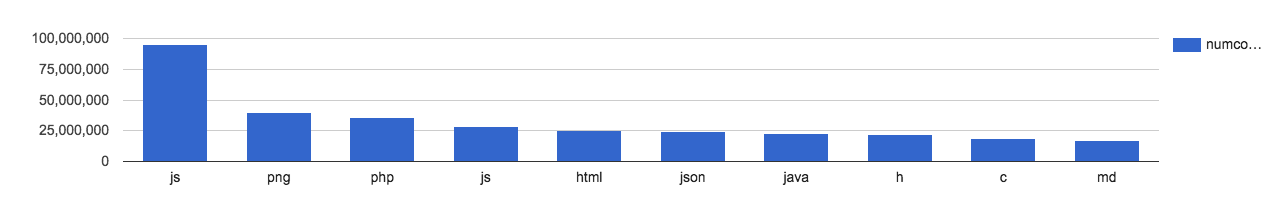

In [52]:
%%chart columns --data github --fields lang,numcommits

In [54]:
# Testing out a notebook with two examples
## Notebook example one
## Looking at bikesharing data